In [3]:
import torch
import torchvision
from torch import nn
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import trange, tqdm
from torch.utils.data import Dataset, DataLoader, random_split
import os
from PIL import Image

# from torchmetrics import PeakSignalNoiseRatio, StructuralSimilarityIndexMeasure

In [2]:
p = torchvision.datasets.LFWPeople(root = './lfw_torch', image_set = 'deepfunneled', download = True)

Files already downloaded and verified


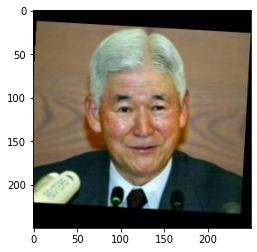

In [3]:
img = torchvision.io.read_image(p.data[6116]).numpy()
plt.imshow(np.transpose(img, (1, 2, 0)))

In [4]:
len(p.data)

13233

In [5]:
'./lfw_torch\\lfw-py\\lfw-deepfunneled\\Jennifer_Aniston\\Jennifer_Aniston_0001.jpg' in p.data

True

In [6]:
s = './lfw_torch\\lfw-py\\lfw-deepfunneled\\Jennifer_Aniston\\Jennifer_Aniston_0018.jpg'

for i, x in enumerate(p.data):
    if x == s:
        print(i)

8072


In [7]:
p.data[:5]

['./lfw_torch\\lfw-py\\lfw-deepfunneled\\Abdel_Madi_Shabneh\\Abdel_Madi_Shabneh_0001.jpg',
 './lfw_torch\\lfw-py\\lfw-deepfunneled\\Abdul_Rahman\\Abdul_Rahman_0001.jpg',
 './lfw_torch\\lfw-py\\lfw-deepfunneled\\Abel_Pacheco\\Abel_Pacheco_0001.jpg',
 './lfw_torch\\lfw-py\\lfw-deepfunneled\\Abel_Pacheco\\Abel_Pacheco_0002.jpg',
 './lfw_torch\\lfw-py\\lfw-deepfunneled\\Abel_Pacheco\\Abel_Pacheco_0003.jpg']

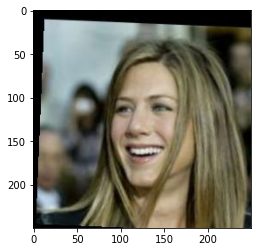

In [8]:
img = torchvision.io.read_image(p.data[8072]).numpy()
plt.imshow(np.transpose(img, (1, 2, 0)))

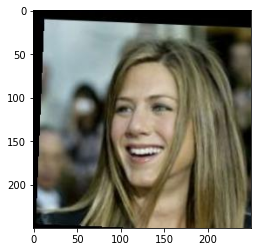

In [9]:
ii = np.array(Image.open(p.data[8072]))
plt.imshow(ii)

In [10]:
ii.shape

(250, 250, 3)

In [11]:
img.shape

(3, 250, 250)

In [12]:
img.dtype

dtype('uint8')

In [13]:
ii.dtype

dtype('uint8')

In [14]:
ii

array([[[ 0,  0,  2],
        [ 0,  0,  2],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  2],
        [ 0,  0,  2],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  2],
        [ 0,  0,  2],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 3,  0,  0],
        [ 3,  0,  0],
        [ 4,  0,  1],
        ...,
        [13, 22, 27],
        [20, 29, 38],
        [19, 29, 38]],

       [[ 4,  0,  0],
        [ 4,  0,  0],
        [ 3,  0,  0],
        ...,
        [18, 27, 32],
        [19, 28, 37],
        [24, 34, 43]],

       [[ 4,  0,  0],
        [ 4,  0,  0],
        [ 3,  0,  0],
        ...,
        [18, 27, 32],
        [27, 36, 45],
        [32, 42, 51]]], dtype=uint8)

In [15]:
np.transpose(img, (1, 2, 0))

array([[[ 0,  0,  2],
        [ 0,  0,  2],
        [ 0,  0,  2],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  2],
        [ 0,  0,  2],
        [ 0,  0,  2],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  2],
        [ 0,  0,  2],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 4,  0,  0],
        [ 3,  0,  0],
        [ 4,  0,  1],
        ...,
        [13, 22, 29],
        [19, 29, 38],
        [17, 30, 39]],

       [[ 4,  0,  0],
        [ 4,  0,  0],
        [ 3,  0,  0],
        ...,
        [18, 27, 34],
        [18, 28, 37],
        [22, 35, 44]],

       [[ 3,  0,  0],
        [ 3,  0,  0],
        [ 3,  0,  0],
        ...,
        [18, 27, 34],
        [26, 36, 45],
        [30, 43, 52]]], dtype=uint8)

In [16]:
(np.transpose(img, (1, 2, 0)) == ii).mean()

0.812192

In [17]:
a = torchvision.io.read_image(p.data[8072])

In [18]:
a.dtype

torch.uint8

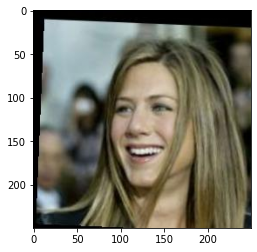

In [19]:
plt.imshow(ii / 255)

In [20]:
# base_transform = torchvision.transforms.Compose([torchvision.transforms.CenterCrop(112), torchvision.transforms.Normalize(0.5, 0.5)])
base_transform = torchvision.transforms.Compose([torchvision.transforms.CenterCrop(112)]) # come interagisce normalize con la divisione per 255?

class LFWP(torchvision.datasets.LFWPeople):
    def __init__(self, root: str, split: str = "10fold", image_set: str = "deepfunneled", transform = torchvision.transforms.GaussianBlur(9, 4), target_transform = None, download: bool = False,
                 base_transform = base_transform, device = None): # default funneled
        super().__init__(root, split, image_set, transform, target_transform, download)
        self.base_transform = base_transform
        self.device = device


    def __getitem__(self, index: int):
        img       = self.base_transform(torchvision.io.read_image(path = self.data[index]) / 255)
        noisy_img = self.transform(img)

        if self.device is not None:
            img, noisy_img = img.to(self.device), noisy_img.to(self.device)

        return img, noisy_img

    def plot(self, index, figsize = (10, 5)):
        img, noisy_img = self[index]
        img = np.transpose(img.cpu().numpy(), (1, 2, 0))
        noisy_img = np.transpose(noisy_img.cpu().numpy(), (1, 2, 0))

        fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = figsize)

        ax[0].imshow(img)
        ax[1].imshow(noisy_img)

        ax[0].set_title('original')
        ax[1].set_title('transformed')

        return ax

In [21]:
w = LFWP('./lfw_torch')

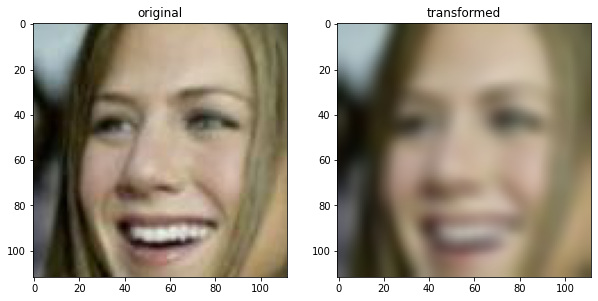

In [22]:
w.plot(8072);

In [23]:
from skimage.filters import gaussian

In [24]:
# gaussian(np.transpose((w[8072][0]).numpy(), (1, 2, 0)), sigma = 4, channel_axis = 2)

In [25]:
# np.transpose((w[8072][1]).numpy(), (1, 2, 0))

## Datasets
Tecnicamente siccome non facciamo cross validation va bene il validation statico anziché rifarlo ogni volta; rifaccio però la funzione perché così se mi serve posso cambiare la batch size come iperparametro del modello

In [26]:
test_dataset  = LFWP('./lfw_torch/', split = 'test', device = 'cuda')
train_dataset = LFWP('./lfw_torch/', split = 'train', device = 'cuda')

In [27]:
def create_train_val_dataloaders(tr_dataset, batch_size: int, training_frac = 0.8, num_workers: int = 0, seed: int = 1234):
    n_train = int(len(tr_dataset) * training_frac)
    n_val   = len(tr_dataset) - n_train
    train, val = random_split(tr_dataset, [n_train, n_val], torch.Generator().manual_seed(seed))

    torch.random.manual_seed(seed)
    torch.cuda.random.manual_seed(seed)

    return DataLoader(train, batch_size, shuffle = True, num_workers = num_workers), DataLoader(val, batch_size, shuffle = False, num_workers = num_workers)

In [13]:
class VAE0(nn.Module): # semplificata, solo relu e adam
    def __init__(self, latent_space_dim: int, initial_lr: float, batch_size: int, dropout: float = None, l1_reg_strength: float = None, l2_reg_strength: float = None,
                loss_fn = nn.MSELoss(reduction = 'sum'), device = 'cuda'):
        super().__init__()
        self.latent_space_dim = latent_space_dim
        self.device = device
        self.dropout = dropout

        self.encoder = nn.Sequential(
            nn.Conv2d(3, 8, kernel_size = 4, stride = 3, padding = 1), #out = (8, 14, 14)
            nn.ReLU(),
            nn.Dropout2d(self.dropout) if dropout is not None else nn.Identity(),
            nn.Conv2d(8, 16, kernel_size = 3, stride = 2, padding = 1), #out = (16, 7, 7)
            nn.ReLU(),
            nn.Dropout(self.dropout) if dropout is not None else nn.Identity(),
            nn.Conv2d(16, 32, kernel_size = 3, stride = 2, padding = 0), #out = (32, 3, 3)
            nn.ReLU(),
            nn.Dropout(self.dropout) if dropout is not None else nn.Identity(),
            nn.Conv2d(32, 32, kernel_size = 3, stride = 2, padding = 0), #out = (32, 3, 3)
            nn.ReLU(),
            nn.Dropout(self.dropout) if dropout is not None else nn.Identity(),
            nn.Flatten(start_dim = 1)
        )
        # 288 = 3*3*32
        self.decoder = nn.Sequential( 
            nn.Linear(self.latent_space_dim, 112),
            nn.ReLU(),
            nn.Dropout(self.dropout) if dropout is not None else nn.Identity(),
            nn.Linear(112, 512), # 288
            nn.ReLU(),
            nn.Dropout(self.dropout) if dropout is not None else nn.Identity(),
            nn.Unflatten(dim = 1, unflattened_size = (32, 4, 4)),
            nn.ConvTranspose2d(32, 32, kernel_size = 3, stride = 2, output_padding = 0),
            nn.ReLU(),
            nn.Dropout(self.dropout) if dropout is not None else nn.Identity(),
            nn.ConvTranspose2d(32, 16, kernel_size = 3, stride = 2, output_padding = 0),
            nn.ReLU(),
            nn.Dropout(self.dropout) if dropout is not None else nn.Identity(),
            nn.ConvTranspose2d(16, 8, kernel_size = 3, stride = 2, padding = 1, output_padding = 0),
            nn.ReLU(),
            nn.Dropout2d(self.dropout) if dropout is not None else nn.Identity(),
            nn.ConvTranspose2d(8, 3, kernel_size = 4, stride = 3, padding = 1, output_padding = 2),
            nn.Sigmoid() #-> [0,1] output
        )

        self.avg = nn.Sequential( # Predicts the means of a MVN dist.
            nn.Linear(512, 112), # 288
            nn.ReLU(),
            nn.Dropout(self.dropout) if dropout is not None else nn.Identity(),
            nn.Linear(112, self.latent_space_dim)
        )

        self.log_var = nn.Sequential( # Predicts the (log) variances of an uncorrelated MVN (i.e. log of cov. matrix diagonal)
            nn.Linear(512, 112), # 288
            nn.ReLU(),
            nn.Dropout(self.dropout) if dropout is not None else nn.Identity(),
            nn.Linear(112, self.latent_space_dim)
        )

        self.optimizer = torch.optim.Adam(params = self.parameters(), lr = initial_lr)
        
        self.batch_size = batch_size
        self.loss_fn = loss_fn
        self.l1_reg_strength = l1_reg_strength
        self.l2_reg_strength = l2_reg_strength

        if l1_reg_strength is None and l2_reg_strength is None:
            self.reg = lambda: torch.tensor([0], dtype = float, requires_grad = True).to(self.device)
        if l1_reg_strength is not None:
            self.reg = lambda: (sum(((w.abs()).sum() for w in self.parameters()))*self.l1_reg_strength).to(self.device)
        if l2_reg_strength is not None:
            self.reg = lambda: (sum(((w**2).sum() for w in self.parameters()))*self.l2_reg_strength).to(self.device)

    def sample_in_latent_space(self, mu, log_var): # sampling from MVN in latent space with provided mean and variances
        sigma = torch.exp(0.5 * log_var) #log_var is log(variance) = log(sigma**2) = 2 * log(sigma)
        return mu + torch.randn_like(mu) * sigma
        #Var(aX) = a**2 Var(X), so we need to multiply pred_sqrt_var = sigma (square root of the variance) by the standard normal distribution

    def forward(self, x):
        internal_repr  = self.encoder(x) # conv. part --> produces the internal representation
        pred_means     = self.avg(internal_repr) # linear part 1 --> predicts means
        pred_log_var   = self.log_var(internal_repr) # linear part 2 --> predicts variances
        sample         = self.sample_in_latent_space(mu = pred_means, log_var = pred_log_var) # sample in latent space
        decoded_sample = self.decoder(sample) # decoder --> produces final output
        
        return decoded_sample, pred_means, pred_log_var # we need to pass means and vars forward too, since they're needed to compute the KL div. term in the loss

    def train_single_epoch(self, train_dataloader, verbose_single_epoch: bool = True): # function to be iterated inside the fit loop (no cv)
        self.train() # enable dropout etc.
        tr_err_single_epoch = 0
        # SOLO BLURRED O PIXELATED
        loading = tqdm(train_dataloader) if verbose_single_epoch else train_dataloader
        for orig_batch, noisy_batch in loading: # ignore y_batch, we don't need the labels
            output, mu, log_var = self(noisy_batch)
            loss                = self.loss_fn(output, orig_batch) + self.reg() - 0.5 * torch.sum(1. + log_var - mu**2 - torch.exp(log_var))
            loss /= len(orig_batch)
            self.optimizer.zero_grad() # reset gradients
            loss.backward() # backpropagation
            self.optimizer.step() # update weights
            tr_err_single_epoch += loss.detach().cpu().numpy() # save current training error
        
        tr_err_single_epoch /= len(train_dataloader) # len of a dataloader = n. of batches
        return tr_err_single_epoch

    @torch.no_grad()
    def val_single_epoch(self, val_dataloader):
        self.eval() # disable dropout etc.
        val_err_single_epoch = 0

        for orig_batch, noisy_batch in val_dataloader: # ignore y_batch, we don't need the labels
            output, mu, log_var   = self(noisy_batch)
            loss                  = nn.MSELoss()(output, orig_batch) # we compare the reconstructed output with the original input
            val_err_single_epoch += loss.detach().cpu().numpy()
        
        val_err_single_epoch /= len(val_dataloader)
        return val_err_single_epoch

    def fit(self, training_dataset, max_n_iter: int = 15, min_n_iter: int = 3, patience: int = 4, tol: float = 0.0001, seed: int = 1234, verbose: bool = True, num_workers: int = 0):
        if seed is not None: # default seed to ensure reproducibility
            torch.random.manual_seed(seed)

        training_dataloader, validation_dataloader = create_train_val_dataloaders(training_dataset, batch_size = self.batch_size, num_workers = num_workers) # dependent on self.batch_size

        self.training_error_history, self.val_error_history = np.zeros(max_n_iter), np.zeros(max_n_iter) # no CV --> no average over dataloaders --> we have a single value to use as an estimate of tr./val. errors
        self.best_val_error = np.Inf
        patience_counter = 0

        loading = trange(max_n_iter) # if verbose else range(max_n_iter) # useful toggle during training/debugging
        for epoch in loading:
            if verbose:
                print(f'Training {epoch=}') # useful to track training
            tr_err  = self.training_error_history[epoch] = self.train_single_epoch(train_dataloader = training_dataloader)
            val_err = self.val_error_history[epoch] = self.val_single_epoch(val_dataloader = validation_dataloader)
            if verbose:
                print(f'{epoch=}: {tr_err=}, {val_err=}') # useful to track training
                self.plot_original_vs_reconstructed_sample(*(test_dataset[0])) # quel tipo con la faccia strana
                # così le fa vedere tutte alla fine

            if epoch > min_n_iter:
                if val_err > self.best_val_error + tol:
                    patience_counter += 1
                else:
                    self.best_val_error = val_err
                    patience_counter = 0
                if patience_counter > patience:
                    break
        n_executed_epochs = epoch + 1 # + 1 to go from 0, N-1 (python) to 1, N (human readable) counting scheme 
        if n_executed_epochs < max_n_iter:
            self.best_val_error_epoch = n_executed_epochs - patience_counter
        else:
            self.best_val_error_epoch = max_n_iter - patience_counter

    def save(self, root_path, model_name):
        path = f'{root_path}/{model_name}'
        torch.save(self.state_dict(), path + '.pt')
        np.savetxt(path + '_th.csv', self.training_error_history)
        np.savetxt(path + '_vh.csv', self.val_error_history)

    @torch.no_grad()
    def predict(self, sample):
        self.eval()
        if sample.shape == torch.Size([3, 112, 112]): # a single sample # torch.Size([1, 28, 28]) in origine (-> serve la dim. 0 = N)
            output = self(sample.unsqueeze(0))[0] # the forward pass computes means and variances too, but here we only want the reconstructed samples
        else:
            output = self(sample)[0]
        return output

    def test_accuracy(self, test_dataset):
        v = np.zeros(len(test_dataset))
        for i in range(len(test_dataset)):
            img, noisy_img = test_dataset[i]
            v[i] = float(nn.MSELoss()(self.predict(noisy_img), img))
        return v.mean()

    def plot_original_vs_reconstructed_sample(self, orig_sample, noisy_sample, figsize = (7, 7), return_array: bool = False):
        fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = figsize)
        img_orig = orig_sample.cpu().detach().squeeze(0).numpy().transpose((1, 2, 0))
        img_rec = self.predict(noisy_sample).cpu().detach().squeeze(0).numpy().transpose((1, 2, 0))
        img_noisy = noisy_sample.cpu().detach().numpy().transpose((1, 2, 0))

        ax[0].imshow(img_orig, cmap = 'gray')
        ax[0].set_title('Orig.')
        ax[0].axis('off')
        ax[1].imshow(img_noisy, cmap = 'gray')
        ax[1].set_title('Noisy')
        ax[1].axis('off')
        ax[2].imshow(img_rec, cmap = 'gray')
        ax[2].set_title('Rec.')
        ax[2].axis('off')

        if return_array:
            return img_rec
        else:
            return fig, ax

    
    def plot_reconstructed_samples(self, dataset, nrows: int = 3, ncols: int = 3, figsize = (42, 21)):
        indices = np.arange(nrows * ncols)
        idx = 0
        ncols = 2*ncols
        fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize = figsize)
        
        for i in range(nrows):
            for j in range(0, ncols, 2):
                img = dataset.data[indices[idx]]
                img_rec = self.plot_original_vs_reconstructed_sample(img, return_array = True)
                # img = img.detach().cpu().squeeze(0).numpy()
                img = img.detach().cpu().numpy().transpose((1, 2, 0))
                ax[i,j].imshow(img, cmap = 'gray')
                ax[i,j].set_title('Orig.')
                ax[i,j].axis('off')
                ax[i,j+1].imshow(img_rec, cmap = 'gray')
                ax[i,j+1].set_title('Rec.')
                ax[i,j+1].axis('off')
                idx += 1

        return fig, ax

In [14]:
model0 = VAE0(64, 1e-3, 8).cuda() # il tipo usa batch size = 8 e 15 epoche, mentre Luca ne usa 30. Sistema sopra/nella chiamata a .fit()

  0%|          | 0/15 [00:00<?, ?it/s]

Training epoch=0


  7%|▋         | 1/15 [00:52<12:11, 52.27s/it]


epoch=0: tr_err=array([1036.15235957]), val_err=0.01954587026807055
Training epoch=1


 13%|█▎        | 2/15 [01:45<11:24, 52.66s/it]


epoch=1: tr_err=array([720.72167699]), val_err=0.016991223368372877
Training epoch=2


 20%|██        | 3/15 [02:38<10:36, 53.03s/it]

epoch=2: tr_err=array([648.28861403]), val_err=0.01568909663566735
Training epoch=3


 27%|██▋       | 4/15 [03:30<09:38, 52.57s/it]


epoch=3: tr_err=array([609.07201557]), val_err=0.015161964668264947
Training epoch=4


 33%|███▎      | 5/15 [04:22<08:44, 52.43s/it]


epoch=4: tr_err=array([581.74478417]), val_err=0.01450740337512109
Training epoch=5


 40%|████      | 6/15 [05:14<07:49, 52.15s/it]

epoch=5: tr_err=array([563.07517879]), val_err=0.013800936821209088
Training epoch=6


 47%|████▋     | 7/15 [06:05<06:55, 51.98s/it]


epoch=6: tr_err=array([545.05881847]), val_err=0.01339063049531756
Training epoch=7


 53%|█████▎    | 8/15 [07:05<06:20, 54.39s/it]


epoch=7: tr_err=array([528.9620309]), val_err=0.013190877616062573
Training epoch=8


 60%|██████    | 9/15 [08:01<05:30, 55.01s/it]

epoch=8: tr_err=array([519.17598967]), val_err=0.012660857547214839
Training epoch=9


 67%|██████▋   | 10/15 [08:56<04:34, 54.83s/it]


epoch=9: tr_err=array([506.71039358]), val_err=0.01248537510181446
Training epoch=10


 73%|███████▎  | 11/15 [09:47<03:35, 53.83s/it]

epoch=10: tr_err=array([494.0032993]), val_err=0.012240997320781443
Training epoch=11


 80%|████████  | 12/15 [10:39<02:39, 53.06s/it]

epoch=11: tr_err=array([481.68879548]), val_err=0.012009121824414411
Training epoch=12


 87%|████████▋ | 13/15 [11:30<01:45, 52.52s/it]

epoch=12: tr_err=array([473.80725012]), val_err=0.01181885710367972
Training epoch=13


 93%|█████████▎| 14/15 [12:21<00:52, 52.14s/it]

epoch=13: tr_err=array([465.02402214]), val_err=0.011409923901867168
Training epoch=14


100%|██████████| 953/953 [00:44<00:00, 21.34it/s]


epoch=14: tr_err=array([456.40709243]), val_err=0.011309049723506224


100%|██████████| 15/15 [13:13<00:00, 52.90s/it]


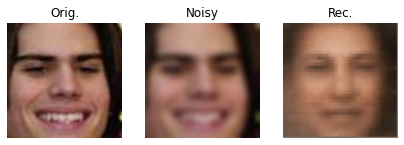

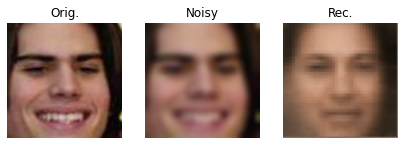

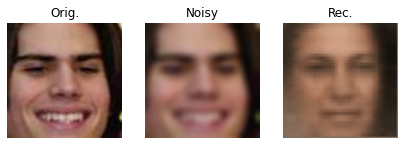

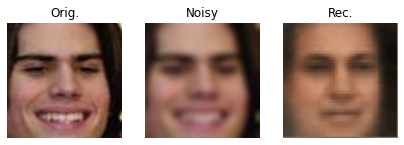

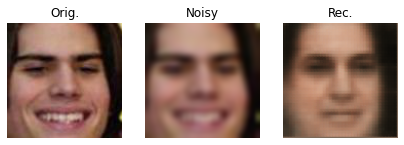

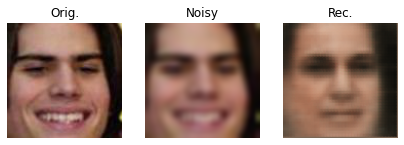

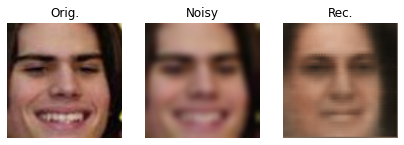

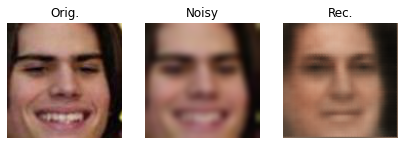

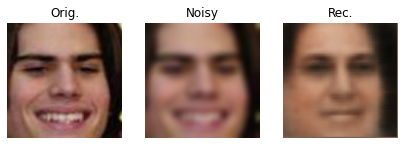

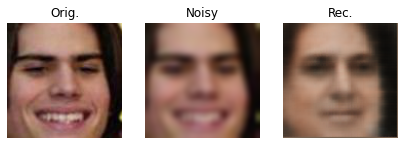

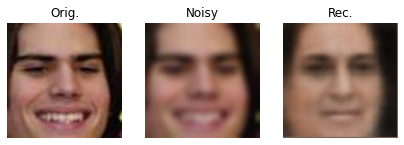

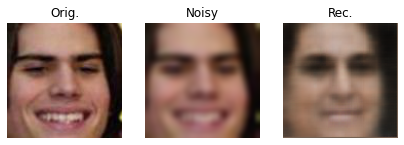

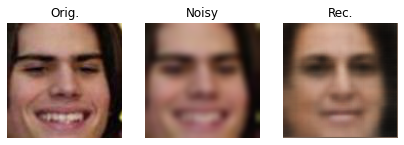

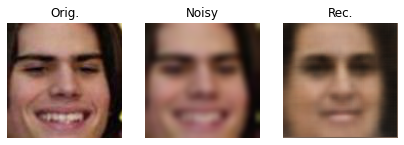

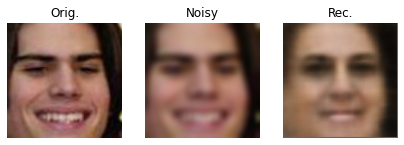

In [149]:
model0.fit(train_dataset)

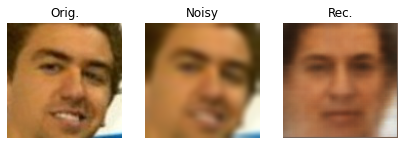

In [28]:
model0.load_state_dict(torch.load('./modelli/model0.pt'))

a, b = train_dataset[500]
a, b = a * 0.5 + 0.5, b * 0.5 + 0.5

model0.plot_original_vs_reconstructed_sample(a, b);

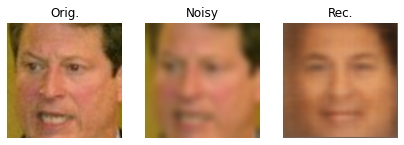

In [29]:
a, b = train_dataset[100]
a, b = a * 0.5 + 0.5, b * 0.5 + 0.5

model0.plot_original_vs_reconstructed_sample(a, b);

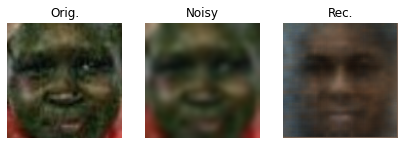

In [30]:
a, b = train_dataset[200]
a, b = a * 0.5 + 0.5, b * 0.5 + 0.5

model0.plot_original_vs_reconstructed_sample(a, b);

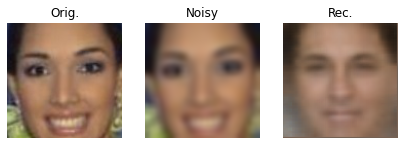

In [31]:
a, b = train_dataset[300]
a, b = a * 0.5 + 0.5, b * 0.5 + 0.5

model0.plot_original_vs_reconstructed_sample(a, b);

## Modello suo senza resblocks

In [31]:
model0.encoder((test_dataset[0][1]).unsqueeze(0)).shape

torch.Size([1, 512])

In [32]:
f = nn.Sequential(
        nn.Conv2d(3, 64, 9), # N, 16, 104, 104
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.Conv2d(64, 64, 4, stride=2, padding=1), # N, 32, 51, 52
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.Conv2d(64, 128, 4, stride=2, padding=1), # N, 32, 26
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.Conv2d(128, 256, 4, stride=2), # N, 32, 12
        nn.BatchNorm2d(256),
        nn.ReLU()
)

f((test_dataset[0][1]).unsqueeze(0).cpu()).shape

torch.Size([1, 256, 12, 12])

In [33]:
nn.Flatten(start_dim=1)(f((test_dataset[0][1]).unsqueeze(0).cpu())).shape

torch.Size([1, 36864])

In [34]:
256*144

36864

In [ ]:
# ## Encoder
#         # N, 3, 112, 112
#         self.encoder = nn.Sequential(
#             nn.Conv2d(3, 64, 9), # N, 16, 104, 104
#             nn.BatchNorm2d(64),
#             nn.ReLU(),
#             nn.Conv2d(64, 64, 4, stride=2, padding=1), # N, 32, 51, 52
#             nn.BatchNorm2d(64),
#             nn.ReLU(),
#             nn.Conv2d(64, 128, 4, stride=2, padding=1), # N, 32, 26
#             nn.BatchNorm2d(128),
#             nn.ReLU(),
#             nn.Conv2d(128, 256, 4, stride=2), # N, 32, 12
#             nn.BatchNorm2d(256),
#             nn.ReLU(),
#         )
        
#         ## Decoder
#         # N, 64, 1, 1
#         self.decoder = nn.Sequential(
#             nn.ConvTranspose2d(256, 256, 4, stride=2), # N, 32, 10, 10
#             nn.BatchNorm2d(256),
#             nn.ReLU(),
#             nn.ConvTranspose2d(256, 128, 4, stride=2, padding=1), # N, 16, 28, 28
#             nn.BatchNorm2d(128),
#             nn.ReLU(),
#             nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1), # N, 16, 56, 56
#             nn.BatchNorm2d(64),
#             nn.ReLU(),
#             nn.ConvTranspose2d(64, 3, 9),
#             nn.Tanh()  
#         )

In [30]:
# nn.ConvTranspose2d(256, 256, 4, stride = 2)(test_dataset[0][1].unsqueeze(0))

In [55]:
u = torch.zeros([1, 256, 12, 12])
f = nn.Sequential(
    nn.Conv2d(256, 128, kernel_size = 8, stride = 2, padding = 0),
    nn.ReLU(),
    nn.Conv2d(128, 64, kernel_size = 2, stride = 2, padding = 0),
    nn.ReLU()
)

print(f(u).shape)
(nn.Flatten(start_dim = 1)(f(u))).shape

torch.Size([1, 64, 1, 1])


torch.Size([1, 64])

In [61]:
nn.ConvTranspose2d(128, 256, kernel_size = 8, stride = 2, padding = 0, output_padding = 0)(nn.ConvTranspose2d(64, 128, kernel_size = 3, stride = 1, padding = 0, output_padding = 0)(f(u))).shape

torch.Size([1, 256, 12, 12])

In [33]:
class VAE1(nn.Module): # semplificata, solo relu e adam
    def __init__(self, latent_space_dim: int, initial_lr: float, batch_size: int, dropout: float = None, l1_reg_strength: float = None, l2_reg_strength: float = None,
                loss_fn = nn.MSELoss(reduction = 'sum'), device = 'cuda'):
        super().__init__()
        self.latent_space_dim = latent_space_dim
        self.device = device
        self.dropout = dropout

        # N, 3, 112, 112
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, 9), # N, 16, 104, 104
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, 4, stride = 2, padding = 1), # N, 32, 51, 52
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 128, 4, stride = 2, padding = 1), # N, 32, 26
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 256, 4, stride = 2), # N, 32, 12
            nn.BatchNorm2d(256),
            nn.ReLU(), # N, 256, 12, 12 -> 36864
            # nn.Flatten(start_dim = 1)
        )
        
        self.decoder = nn.Sequential(
            nn.Unflatten(dim = 1, unflattened_size = (64, 1, 1)),
            nn.ConvTranspose2d(64, 128, kernel_size = 3, stride = 1, padding = 0, output_padding = 0),
            nn.ReLU(), # N 128 3 3 
            nn.ConvTranspose2d(128, 256, kernel_size = 8, stride = 2, padding = 0, output_padding = 0),
            nn.ReLU(), # N 256 12 12
           
           
            # nn.Linear(self.latent_space_dim, 36864),
            # nn.ReLU(),

            # nn.Linear(self.latent_space_dim, 100),
            # nn.ReLU(),
            # nn.Linear(100, 36864),
            # nn.ReLU(),
            # nn.Unflatten(dim = 1, unflattened_size = (256, 12, 12)),
            nn.ConvTranspose2d(256, 256, 4, stride = 2), # N, 32, 10, 10
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, 4, stride = 2, padding = 1), # N, 16, 28, 28
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, 4, stride = 2, padding = 1), # N, 16, 56, 56
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, 9),
            nn.Tanh()  
        )

        self.avg = nn.Sequential( # Predicts the means of a MVN dist.
            # nn.Linear(36864, 100),
            # nn.ReLU(),
            # # nn.Dropout(self.dropout) if dropout is not None else nn.Identity(),
            # nn.Linear(100, self.latent_space_dim)

            # nn.Linear(36864, self.latent_space_dim),
            # nn.ReLU()

            # N 256 12 12
            nn.Conv2d(256, 128, kernel_size = 8, stride = 2, padding = 0),
            nn.ReLU(), # N 128 3 3
            nn.Conv2d(128, 64, kernel_size = 2, stride = 2, padding = 0),
            nn.ReLU(), # a questo punto è N * 64 * 1 * 1, cioè un flatten "naturale"
            nn.Flatten(start_dim = 1)
        )

        self.log_var = nn.Sequential( # Predicts the (log) variances of an uncorrelated MVN (i.e. log of cov. matrix diagonal)
            # nn.Linear(36864, 100), # 288
            # nn.ReLU(),
            # # nn.Dropout(self.dropout) if dropout is not None else nn.Identity(),
            # nn.Linear(100, self.latent_space_dim)

            # nn.Linear(36864, self.latent_space_dim),
            # nn.ReLU()

            nn.Conv2d(256, 128, kernel_size = 8, stride = 2, padding = 0),
            nn.ReLU(),
            nn.Conv2d(128, 64, kernel_size = 2, stride = 2, padding = 0),
            nn.ReLU(), # a questo punto è N * 64 * 1 * 1, cioè un flatten "naturale"
            nn.Flatten(start_dim = 1)
        )

        self.optimizer = torch.optim.Adam(params = self.parameters(), lr = initial_lr)
        
        self.batch_size = batch_size
        self.loss_fn = loss_fn
        self.l1_reg_strength = l1_reg_strength
        self.l2_reg_strength = l2_reg_strength

        if l1_reg_strength is None and l2_reg_strength is None:
            self.reg = lambda: torch.tensor([0], dtype = float, requires_grad = True).to(self.device)
        if l1_reg_strength is not None:
            self.reg = lambda: (sum(((w.abs()).sum() for w in self.parameters()))*self.l1_reg_strength).to(self.device)
        if l2_reg_strength is not None:
            self.reg = lambda: (sum(((w**2).sum() for w in self.parameters()))*self.l2_reg_strength).to(self.device)

    def sample_in_latent_space(self, mu, log_var): # sampling from MVN in latent space with provided mean and variances
        sigma = torch.exp(0.5 * log_var) #log_var is log(variance) = log(sigma**2) = 2 * log(sigma)
        return mu + torch.randn_like(mu) * sigma
        #Var(aX) = a**2 Var(X), so we need to multiply pred_sqrt_var = sigma (square root of the variance) by the standard normal distribution

    def forward(self, x):
        internal_repr  = self.encoder(x) # conv. part --> produces the internal representation
        pred_means     = self.avg(internal_repr) # linear part 1 --> predicts means
        pred_log_var   = self.log_var(internal_repr) # linear part 2 --> predicts variances
        sample         = self.sample_in_latent_space(mu = pred_means, log_var = pred_log_var) # sample in latent space
        decoded_sample = self.decoder(sample) # decoder --> produces final output
        
        return decoded_sample, pred_means, pred_log_var # we need to pass means and vars forward too, since they're needed to compute the KL div. term in the loss

    def train_single_epoch(self, train_dataloader, verbose_single_epoch: bool = True): # function to be iterated inside the fit loop (no cv)
        self.train() # enable dropout etc.
        tr_err_single_epoch = 0
        # SOLO BLURRED O PIXELATED
        loading = tqdm(train_dataloader) if verbose_single_epoch else train_dataloader
        for orig_batch, noisy_batch in loading: # ignore y_batch, we don't need the labels
            output, mu, log_var = self(noisy_batch)
            loss                = self.loss_fn(output, orig_batch) + self.reg() - 0.5 * torch.sum(1. + log_var - mu**2 - torch.exp(log_var))
            loss /= len(orig_batch)
            self.optimizer.zero_grad() # reset gradients
            loss.backward() # backpropagation
            self.optimizer.step() # update weights
            tr_err_single_epoch += loss.detach().cpu().numpy() # save current training error
        
        tr_err_single_epoch /= len(train_dataloader) # len of a dataloader = n. of batches
        return tr_err_single_epoch

    @torch.no_grad()
    def val_single_epoch(self, val_dataloader):
        self.eval() # disable dropout etc.
        val_err_single_epoch = 0

        for orig_batch, noisy_batch in val_dataloader: # ignore y_batch, we don't need the labels
            output, mu, log_var   = self(noisy_batch)
            loss                  = nn.MSELoss()(output, orig_batch) # we compare the reconstructed output with the original input
            val_err_single_epoch += loss.detach().cpu().numpy()
        
        val_err_single_epoch /= len(val_dataloader)
        return val_err_single_epoch

    def fit(self, training_dataset, max_n_iter: int = 15, min_n_iter: int = 3, patience: int = 4, tol: float = 0.0001, seed: int = 1234, verbose: bool = True, num_workers: int = 0):
        if seed is not None: # default seed to ensure reproducibility
            torch.random.manual_seed(seed)

        training_dataloader, validation_dataloader = create_train_val_dataloaders(training_dataset, batch_size = self.batch_size, num_workers = num_workers) # dependent on self.batch_size

        self.training_error_history, self.val_error_history = np.zeros(max_n_iter), np.zeros(max_n_iter) # no CV --> no average over dataloaders --> we have a single value to use as an estimate of tr./val. errors
        self.best_val_error = np.Inf
        patience_counter = 0

        loading = trange(max_n_iter) # if verbose else range(max_n_iter) # useful toggle during training/debugging
        for epoch in loading:
            if verbose:
                print(f'Training {epoch=}') # useful to track training
            tr_err  = self.training_error_history[epoch] = self.train_single_epoch(train_dataloader = training_dataloader)
            val_err = self.val_error_history[epoch] = self.val_single_epoch(val_dataloader = validation_dataloader)
            if verbose:
                print(f'{epoch=}: {tr_err=}, {val_err=}') # useful to track training
                self.plot_original_vs_reconstructed_sample(*(test_dataset[0])) # quel tipo con la faccia strana
                # così le fa vedere tutte alla fine

            if epoch > min_n_iter:
                if val_err > self.best_val_error + tol:
                    patience_counter += 1
                else:
                    self.best_val_error = val_err
                    patience_counter = 0
                if patience_counter > patience:
                    break
        n_executed_epochs = epoch + 1 # + 1 to go from 0, N-1 (python) to 1, N (human readable) counting scheme 
        if n_executed_epochs < max_n_iter:
            self.best_val_error_epoch = n_executed_epochs - patience_counter
        else:
            self.best_val_error_epoch = max_n_iter - patience_counter

    def save(self, root_path, model_name):
        path = f'{root_path}/{model_name}'
        torch.save(self.state_dict(), path + '.pt')
        np.savetxt(path + '_th.csv', self.training_error_history)
        np.savetxt(path + '_vh.csv', self.val_error_history)

    @torch.no_grad()
    def predict(self, sample):
        self.eval()
        if sample.shape == torch.Size([3, 112, 112]): # a single sample # torch.Size([1, 28, 28]) in origine (-> serve la dim. 0 = N)
            output = self(sample.unsqueeze(0))[0] # the forward pass computes means and variances too, but here we only want the reconstructed samples
        else:
            output = self(sample)[0]
        return output

    def test_accuracy(self, test_dataset):
        v = np.zeros(len(test_dataset))
        for i in range(len(test_dataset)):
            img, noisy_img = test_dataset[i]
            v[i] = float(nn.MSELoss()(self.predict(noisy_img), img))
        return v.mean()

    def plot_original_vs_reconstructed_sample(self, orig_sample, noisy_sample, figsize = (7, 7), return_array: bool = False):
        fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = figsize)
        img_orig = orig_sample.cpu().detach().squeeze(0).numpy().transpose((1, 2, 0))
        img_rec = self.predict(noisy_sample).cpu().detach().squeeze(0).numpy().transpose((1, 2, 0))
        img_noisy = noisy_sample.cpu().detach().numpy().transpose((1, 2, 0))

        ax[0].imshow(img_orig, cmap = 'gray')
        ax[0].set_title('Orig.')
        ax[0].axis('off')
        ax[1].imshow(img_noisy, cmap = 'gray')
        ax[1].set_title('Noisy')
        ax[1].axis('off')
        ax[2].imshow(img_rec, cmap = 'gray')
        ax[2].set_title('Rec.')
        ax[2].axis('off')

        if return_array:
            return img_rec
        else:
            return fig, ax

    
    def plot_reconstructed_samples(self, dataset, nrows: int = 3, ncols: int = 3, figsize = (42, 21)):
        indices = np.arange(nrows * ncols)
        idx = 0
        ncols = 2*ncols
        fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize = figsize)
        
        for i in range(nrows):
            for j in range(0, ncols, 2):
                img = dataset.data[indices[idx]]
                img_rec = self.plot_original_vs_reconstructed_sample(img, return_array = True)
                # img = img.detach().cpu().squeeze(0).numpy()
                img = img.detach().cpu().numpy().transpose((1, 2, 0))
                ax[i,j].imshow(img, cmap = 'gray')
                ax[i,j].set_title('Orig.')
                ax[i,j].axis('off')
                ax[i,j+1].imshow(img_rec, cmap = 'gray')
                ax[i,j+1].set_title('Rec.')
                ax[i,j+1].axis('off')
                idx += 1

        return fig, ax

In [34]:
model1 = VAE1(50, 1e-3, 8)#.cuda()

In [31]:
test_dataset  = LFWP('./lfw_torch/', split = 'test') #, device = 'cuda'
train_dataset = LFWP('./lfw_torch/', split = 'train') #, device = 'cuda'

In [35]:
model1.fit(train_dataset, max_n_iter = 15)

  0%|          | 0/15 [00:00<?, ?it/s]

Training epoch=0


  0%|          | 0/15 [02:04<?, ?it/s]


KeyboardInterrupt: 

## Luca lett.

In [4]:
# base_transform = torchvision.transforms.Compose([torchvision.transforms.CenterCrop(112), torchvision.transforms.Normalize(0.5, 0.5)])
base_transform = torchvision.transforms.Compose([torchvision.transforms.CenterCrop(112)]) # come interagisce normalize con la divisione per 255?

class LFWP_norm(torchvision.datasets.LFWPeople):
    def __init__(self, root: str, split: str = "10fold", image_set: str = "deepfunneled", transform = torchvision.transforms.GaussianBlur(9, 4), target_transform = None, download: bool = False,
                 base_transform = base_transform, device = None): # default funneled
        super().__init__(root, split, image_set, transform, target_transform, download)
        self.base_transform = base_transform
        self.device = device
        self.normaliz_transform = torchvision.transforms.Normalize(0.5, 0.5)


    def __getitem__(self, index: int):
        img       = self.base_transform(torchvision.io.read_image(path = self.data[index]) / 255)
        noisy_img = self.transform(img)

        img, noisy_img = self.normaliz_transform(img), self.normaliz_transform(noisy_img)
        if self.device is not None:
            img, noisy_img = img.to(self.device), noisy_img.to(self.device)

        return img, noisy_img

    def plot(self, index, figsize = (10, 5)):
        img, noisy_img = self[index]

        img, noisy_img = img * 0.5 + 0.5, noisy_img * 0.5 + 0.5

        img = np.transpose(img.cpu().numpy(), (1, 2, 0))
        noisy_img = np.transpose(noisy_img.cpu().numpy(), (1, 2, 0))

        fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = figsize)

        ax[0].imshow(img)
        ax[1].imshow(noisy_img)

        ax[0].set_title('original')
        ax[1].set_title('transformed')

        return ax

In [10]:
test_dataset  = LFWP_norm('./lfw_torch/', split = 'test', image_set = 'funneled', device = 'cuda') #, device = 'cuda'
train_dataset = LFWP_norm('./lfw_torch/', split = 'train', image_set = 'funneled', device = 'cuda') #, device = 'cuda'

def create_train_val_dataloaders(tr_dataset, batch_size: int, training_frac = 0.8, num_workers: int = 0, seed: int = 1234):
    n_train = int(len(tr_dataset) * training_frac)
    n_val   = len(tr_dataset) - n_train
    train, val = random_split(tr_dataset, [n_train, n_val], torch.Generator().manual_seed(seed))

    torch.random.manual_seed(seed)
    torch.cuda.random.manual_seed(seed)

    return DataLoader(train, batch_size, shuffle = True, num_workers = num_workers), DataLoader(val, batch_size, shuffle = False, num_workers = num_workers)

In [6]:
class CAE1(nn.Module): # semplificata, solo relu e adam
    def __init__(self, latent_space_dim: int, initial_lr: float, batch_size: int, dropout: float = None, l1_reg_strength: float = None, l2_reg_strength: float = None,
                loss_fn = nn.MSELoss(reduction = 'sum'), device = 'cuda'):
        super().__init__()
        self.latent_space_dim = latent_space_dim
        self.device = device
        self.dropout = dropout

        # N, 3, 112, 112
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, 9), # N, 16, 104, 104
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, 4, stride = 2, padding = 1), # N, 32, 51, 52
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 128, 4, stride = 2, padding = 1), # N, 32, 26
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 256, 4, stride = 2), # N, 32, 12
            nn.BatchNorm2d(256),
            nn.ReLU(), # N, 256, 12, 12 -> 36864
            # nn.Flatten(start_dim = 1)
        )
        
        self.decoder = nn.Sequential(
            # nn.Unflatten(dim = 1, unflattened_size = (64, 1, 1)),
            # nn.ConvTranspose2d(64, 128, kernel_size = 3, stride = 1, padding = 0, output_padding = 0),
            # nn.ReLU(), # N 128 3 3 
            # nn.ConvTranspose2d(128, 256, kernel_size = 8, stride = 2, padding = 0, output_padding = 0),
            # nn.ReLU(), # N 256 12 12
           
           
            # nn.Linear(self.latent_space_dim, 36864),
            # nn.ReLU(),

            # nn.Linear(self.latent_space_dim, 100),
            # nn.ReLU(),
            # nn.Linear(100, 36864),
            # nn.ReLU(),
            # nn.Unflatten(dim = 1, unflattened_size = (256, 12, 12)),
            nn.ConvTranspose2d(256, 256, 4, stride = 2), # N, 32, 10, 10
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, 4, stride = 2, padding = 1), # N, 16, 28, 28
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, 4, stride = 2, padding = 1), # N, 16, 56, 56
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, 9),
            nn.Tanh()  
        )

        self.avg = nn.Sequential( # Predicts the means of a MVN dist.
            # nn.Linear(36864, 100),
            # nn.ReLU(),
            # # nn.Dropout(self.dropout) if dropout is not None else nn.Identity(),
            # nn.Linear(100, self.latent_space_dim)

            # nn.Linear(36864, self.latent_space_dim),
            # nn.ReLU()

            # N 256 12 12
            nn.Conv2d(256, 128, kernel_size = 8, stride = 2, padding = 0),
            nn.ReLU(), # N 128 3 3
            nn.Conv2d(128, 64, kernel_size = 2, stride = 2, padding = 0),
            nn.ReLU(), # a questo punto è N * 64 * 1 * 1, cioè un flatten "naturale"
            nn.Flatten(start_dim = 1)
        )

        self.log_var = nn.Sequential( # Predicts the (log) variances of an uncorrelated MVN (i.e. log of cov. matrix diagonal)
            # nn.Linear(36864, 100), # 288
            # nn.ReLU(),
            # # nn.Dropout(self.dropout) if dropout is not None else nn.Identity(),
            # nn.Linear(100, self.latent_space_dim)

            # nn.Linear(36864, self.latent_space_dim),
            # nn.ReLU()

            nn.Conv2d(256, 128, kernel_size = 8, stride = 2, padding = 0),
            nn.ReLU(),
            nn.Conv2d(128, 64, kernel_size = 2, stride = 2, padding = 0),
            nn.ReLU(), # a questo punto è N * 64 * 1 * 1, cioè un flatten "naturale"
            nn.Flatten(start_dim = 1)
        )

        self.optimizer = torch.optim.Adam(params = self.parameters(), lr = initial_lr)
        
        self.batch_size = batch_size
        self.loss_fn = loss_fn
        self.l1_reg_strength = l1_reg_strength
        self.l2_reg_strength = l2_reg_strength

        if l1_reg_strength is None and l2_reg_strength is None:
            self.reg = lambda: torch.tensor([0], dtype = float, requires_grad = True).to(self.device)
        if l1_reg_strength is not None:
            self.reg = lambda: (sum(((w.abs()).sum() for w in self.parameters()))*self.l1_reg_strength).to(self.device)
        if l2_reg_strength is not None:
            self.reg = lambda: (sum(((w**2).sum() for w in self.parameters()))*self.l2_reg_strength).to(self.device)

    def sample_in_latent_space(self, mu, log_var): # sampling from MVN in latent space with provided mean and variances
        sigma = torch.exp(0.5 * log_var) #log_var is log(variance) = log(sigma**2) = 2 * log(sigma)
        return mu + torch.randn_like(mu) * sigma
        #Var(aX) = a**2 Var(X), so we need to multiply pred_sqrt_var = sigma (square root of the variance) by the standard normal distribution

    def forward(self, x):
        internal_repr  = self.encoder(x) # conv. part --> produces the internal representation
        # pred_means     = self.avg(internal_repr) # linear part 1 --> predicts means
        # pred_log_var   = self.log_var(internal_repr) # linear part 2 --> predicts variances
        # sample         = self.sample_in_latent_space(mu = pred_means, log_var = pred_log_var) # sample in latent space
        # decoded_sample = self.decoder(sample) # decoder --> produces final output
        decoded_sample = self.decoder(internal_repr)

        return decoded_sample#, pred_means, pred_log_var # we need to pass means and vars forward too, since they're needed to compute the KL div. term in the loss

    def train_single_epoch(self, train_dataloader, verbose_single_epoch: bool = True): # function to be iterated inside the fit loop (no cv)
        self.train() # enable dropout etc.
        tr_err_single_epoch = 0
        # SOLO BLURRED O PIXELATED
        loading = tqdm(train_dataloader) if verbose_single_epoch else train_dataloader
        for orig_batch, noisy_batch in loading: # ignore y_batch, we don't need the labels
            # output, mu, log_var = self(noisy_batch)
            # loss                = self.loss_fn(output, orig_batch) + self.reg() - 0.5 * torch.sum(1. + log_var - mu**2 - torch.exp(log_var))
            output = self(noisy_batch)
            loss = self.loss_fn(output, orig_batch) + self.reg()
            loss /= len(orig_batch)
            self.optimizer.zero_grad() # reset gradients
            loss.backward() # backpropagation
            self.optimizer.step() # update weights
            tr_err_single_epoch += loss.detach().cpu().numpy() # save current training error
        
        tr_err_single_epoch /= len(train_dataloader) # len of a dataloader = n. of batches
        return tr_err_single_epoch

    @torch.no_grad()
    def val_single_epoch(self, val_dataloader):
        self.eval() # disable dropout etc.
        val_err_single_epoch = 0

        for orig_batch, noisy_batch in val_dataloader: # ignore y_batch, we don't need the labels
            # output, mu, log_var   = self(noisy_batch)
            output = self(noisy_batch)
            loss                  = nn.MSELoss()(output, orig_batch) # we compare the reconstructed output with the original input
            val_err_single_epoch += loss.detach().cpu().numpy()
        
        val_err_single_epoch /= len(val_dataloader)
        return val_err_single_epoch

    def fit(self, training_dataset, max_n_iter: int = 15, min_n_iter: int = 3, patience: int = 4, tol: float = 0.0001, seed: int = 1234, verbose: bool = True, num_workers: int = 0):
        if seed is not None: # default seed to ensure reproducibility
            torch.random.manual_seed(seed)

        training_dataloader, validation_dataloader = create_train_val_dataloaders(training_dataset, batch_size = self.batch_size, num_workers = num_workers) # dependent on self.batch_size

        self.training_error_history, self.val_error_history = np.zeros(max_n_iter), np.zeros(max_n_iter) # no CV --> no average over dataloaders --> we have a single value to use as an estimate of tr./val. errors
        self.best_val_error = np.Inf
        patience_counter = 0

        loading = trange(max_n_iter) # if verbose else range(max_n_iter) # useful toggle during training/debugging
        for epoch in loading:
            if verbose:
                print(f'Training {epoch=}') # useful to track training
            tr_err  = self.training_error_history[epoch] = self.train_single_epoch(train_dataloader = training_dataloader)
            val_err = self.val_error_history[epoch] = self.val_single_epoch(val_dataloader = validation_dataloader)
            if verbose:
                print(f'{epoch=}: {tr_err=}, {val_err=}') # useful to track training
                self.plot_original_vs_reconstructed_sample(*(test_dataset[0])) # quel tipo con la faccia strana
                # così le fa vedere tutte alla fine

            if epoch > min_n_iter:
                if val_err > self.best_val_error + tol:
                    patience_counter += 1
                else:
                    self.best_val_error = val_err
                    patience_counter = 0
                if patience_counter > patience:
                    break
        n_executed_epochs = epoch + 1 # + 1 to go from 0, N-1 (python) to 1, N (human readable) counting scheme 
        if n_executed_epochs < max_n_iter:
            self.best_val_error_epoch = n_executed_epochs - patience_counter
        else:
            self.best_val_error_epoch = max_n_iter - patience_counter

    def save(self, root_path, model_name):
        path = f'{root_path}/{model_name}'
        torch.save(self.state_dict(), path + '.pt')
        np.savetxt(path + '_th.csv', self.training_error_history)
        np.savetxt(path + '_vh.csv', self.val_error_history)

    @torch.no_grad()
    def predict(self, sample):
        self.eval()
        if sample.shape == torch.Size([3, 112, 112]): # a single sample # torch.Size([1, 28, 28]) in origine (-> serve la dim. 0 = N)
            output = self(sample.unsqueeze(0))[0] # the forward pass computes means and variances too, but here we only want the reconstructed samples
        else:
            output = self(sample)[0]
        return output

    def test_accuracy(self, test_dataset):
        v = np.zeros(len(test_dataset))
        for i in range(len(test_dataset)):
            img, noisy_img = test_dataset[i]
            v[i] = float(nn.MSELoss()(self.predict(noisy_img), img))
        return v.mean()

    def plot_original_vs_reconstructed_sample(self, orig_sample, noisy_sample, figsize = (7, 7), return_array: bool = False):
        fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = figsize)
        img_orig = orig_sample.cpu().detach().squeeze(0).numpy().transpose((1, 2, 0))
        img_rec = self.predict(noisy_sample).cpu().detach().squeeze(0).numpy().transpose((1, 2, 0))
        img_noisy = noisy_sample.cpu().detach().numpy().transpose((1, 2, 0))

        ax[0].imshow(img_orig, cmap = 'gray')
        ax[0].set_title('Orig.')
        ax[0].axis('off')
        ax[1].imshow(img_noisy, cmap = 'gray')
        ax[1].set_title('Noisy')
        ax[1].axis('off')
        ax[2].imshow(img_rec, cmap = 'gray')
        ax[2].set_title('Rec.')
        ax[2].axis('off')

        if return_array:
            return img_rec
        else:
            return fig, ax

    
    def plot_reconstructed_samples(self, dataset, nrows: int = 3, ncols: int = 3, figsize = (42, 21)):
        indices = np.arange(nrows * ncols)
        idx = 0
        ncols = 2*ncols
        fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize = figsize)
        
        for i in range(nrows):
            for j in range(0, ncols, 2):
                img = dataset.data[indices[idx]]
                img_rec = self.plot_original_vs_reconstructed_sample(img, return_array = True)
                # img = img.detach().cpu().squeeze(0).numpy()
                img = img.detach().cpu().numpy().transpose((1, 2, 0))
                ax[i,j].imshow(img, cmap = 'gray')
                ax[i,j].set_title('Orig.')
                ax[i,j].axis('off')
                ax[i,j+1].imshow(img_rec, cmap = 'gray')
                ax[i,j+1].set_title('Rec.')
                ax[i,j+1].axis('off')
                idx += 1

        return fig, ax

In [11]:
model1 = CAE1(50, 1e-3, 8).cuda()

In [12]:
model1.fit(train_dataset)

  0%|          | 0/15 [00:00<?, ?it/s]

Training epoch=0


  0%|          | 0/15 [00:08<?, ?it/s]


KeyboardInterrupt: 